# Preliminary Data exploration

Dataset met alle metadata en preprocessing steps binnenhalen.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../Materials/KVO_META.csv", encoding='utf8', index_col=False)


## Frequenties

In [46]:
df['Original language'].value_counts(dropna=False)

DUI    2055
NL      921
FR      584
?       225
ITA     220
NaN     149
RUS     134
TSJ     101
DEE      66
ENG      12
NOR       3
Name: Original language, dtype: int64

### Aantal observaties per seizoen

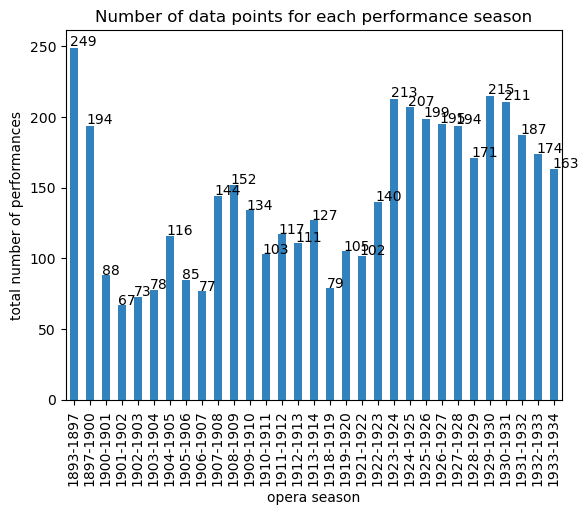

In [23]:
# Count the number of data points for each index
counts = df['Collection'].value_counts().sort_index(axis=0).plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of performances')
plt.title('Number of data points for each performance season')

# Plot the counts as a bar chart

for p in counts.patches:
    counts.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

# Show the plot
plt.show()

### TOP 10 producties

<AxesSubplot:>

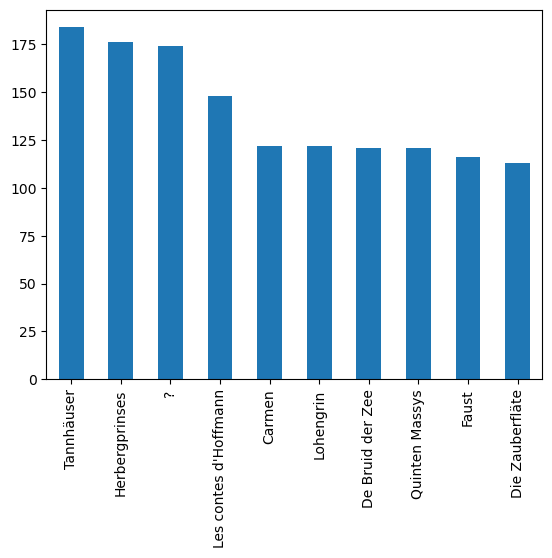

In [24]:
df['Original title'].value_counts().head(10).plot(kind='bar')
#top 10 meest gespeelde producties


### TOP 10 componisten

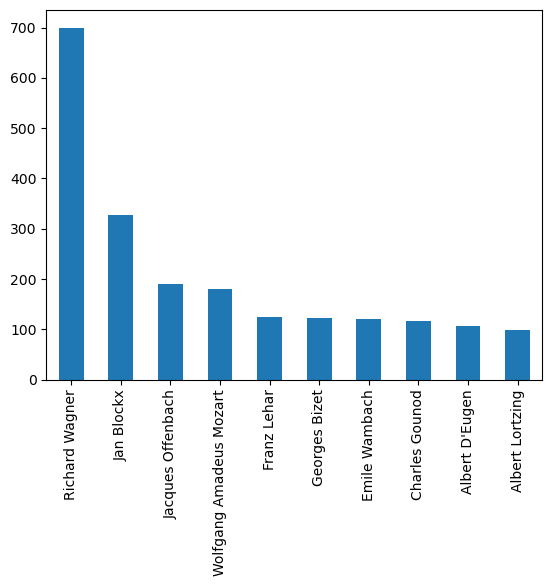

In [25]:
df['Composer'].value_counts().head(10).plot.bar();
#Meer dan 17% van alle voorstellingen waren werken van Wagner

### Evolutie van oorspronkelijke taal van producties.

#### Absolute frequentie

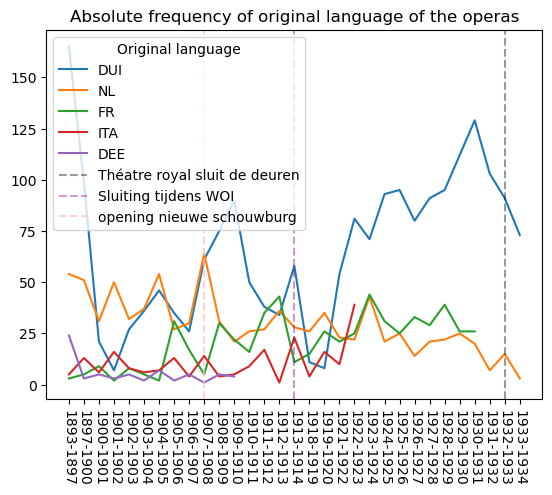

In [27]:
DUI = df[df['Original language']=='DUI']
NL = df[df['Original language']=='NL']
FR = df[df['Original language']=='FR']
ITA = df[df['Original language']=='ITA']
DEE = df[df['Original language']=='DEE']

Iksas = list(df['Collection'].unique())
#import matplotlib.pyplot as plt

#plot each series
plt.plot(Iksas, list(DUI.groupby('Collection')['Original language'].value_counts()), label = 'DUI')
plt.plot(list(NL.groupby('Collection')['Original language'].value_counts()),label = 'NL')
plt.plot(list(FR.groupby('Collection')['Original language'].value_counts()),label = 'FR')
plt.plot(list(ITA.groupby('Collection')['Original language'].value_counts()), label = 'ITA')
plt.plot(list(DEE.groupby('Collection')['Original language'].value_counts()),label = 'DEE')
plt.plot()

plt.title('Absolute frequency of original language of the operas')
plt.xticks(rotation=-90)
#display plot
plt.axvline(x='1932-1933', color = 'black', alpha = 0.4, linestyle = '--', label = 'Théatre royal sluit de deuren')
plt.axvline(x='1913-1914', color = 'purple', alpha = 0.4, linestyle = '--', label = 'Sluiting tijdens WOI')
plt.axvline(x='1907-1908', color = 'pink', alpha = 0.7, linestyle = '--', label = 'opening nieuwe schouwburg')

legend = plt.legend(title='Original language')

plt.show()




#### Relatieve frequentie

In [28]:
def obtain_rel_freq(taal): #de taal neemt dus de vorm aan van één van die dfs eh dus DUI of NL of ITA ofzo
    rel_freq = []
    total = list(df['Collection'].value_counts().sort_index(axis=0))
    tal = list(taal.groupby('Collection')['Original language'].value_counts())
    tal = zip(total, tal)
    for item in tal:
        rel_freq.append(item[1]/item[0])
    return rel_freq

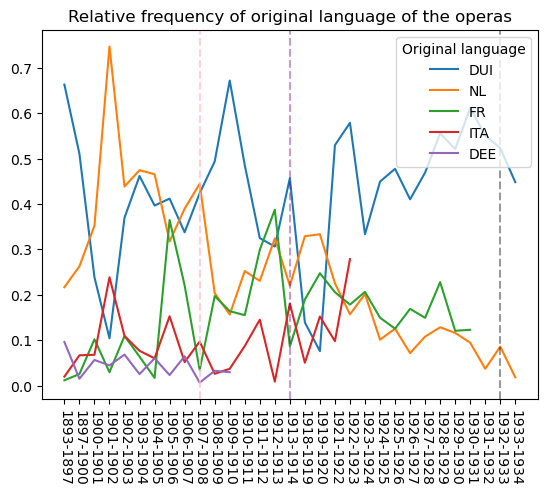

In [29]:
rel_ned = obtain_rel_freq(NL)
rel_dui = obtain_rel_freq(DUI)
rel_fr = obtain_rel_freq(FR)
rel_ita = obtain_rel_freq(ITA)
rel_dee = obtain_rel_freq(DEE)

Iksas = list(df['Collection'].unique())

#plot each series
plt.plot(Iksas, rel_dui, label = 'DUI')
plt.plot(rel_ned,label = 'NL')
plt.plot(rel_fr,label = 'FR')
plt.plot(rel_ita, label = 'ITA')
plt.plot(rel_dee,label = 'DEE')
plt.plot()

plt.legend(loc = 'upper right', title='Original language')
plt.title('Relative frequency of original language of the operas')
plt.xticks(rotation=-90)
plt.axvline(x='1932-1933', color = 'black', alpha = 0.4, linestyle = '--', label = 'Théatre royal closes')
plt.axvline(x='1913-1914', color = 'purple', alpha = 0.4, linestyle = '--', label = 'Opera closed during WWI')
plt.axvline(x='1907-1908', color = 'pink', alpha = 0.7, linestyle = '--', label = 'Opening new opera building')

#display plot
plt.show()

#Stream graph

## Gegoten in een stream plot

In excel nog niet gelukt, maar in Python is dat zo gepiept.<br>
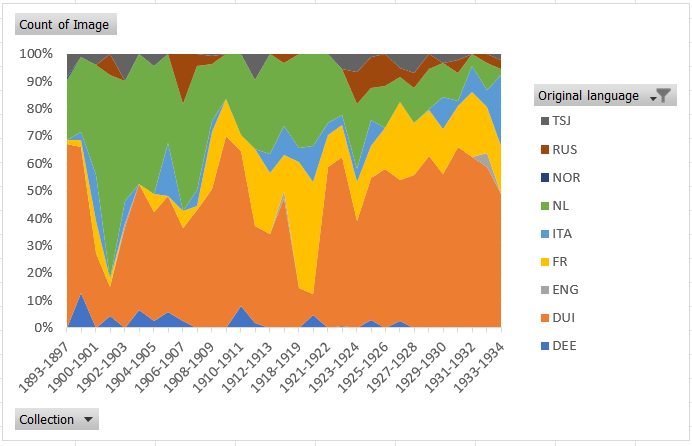

## Gala / Volksvertoningen

In [30]:
#Gefilterede df's waarin enkel de volksvertoningen en galavoorstellingen in beschouwing worden genomen
volk = df[df['Occasion'].astype(str).str.contains("Volk")]
galas = df[df['Occasion'].str.contains('Gala') | (df['Occasion'] == 'Gala')]

### Absolute frequenties

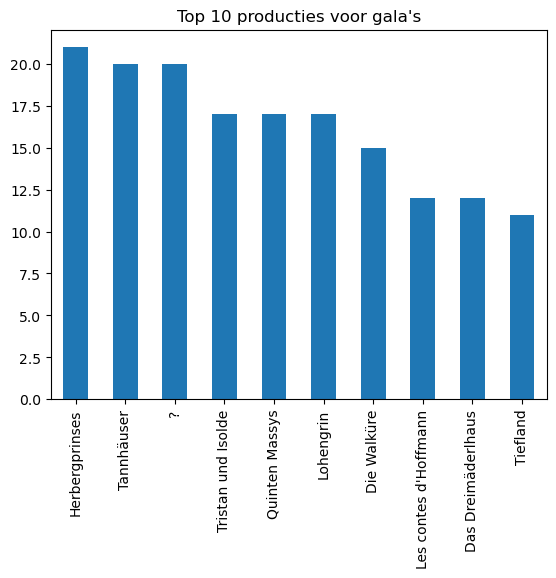

In [31]:
galas['Original title'].value_counts().head(10).plot(kind='bar', title="Top 10 producties voor gala's");  

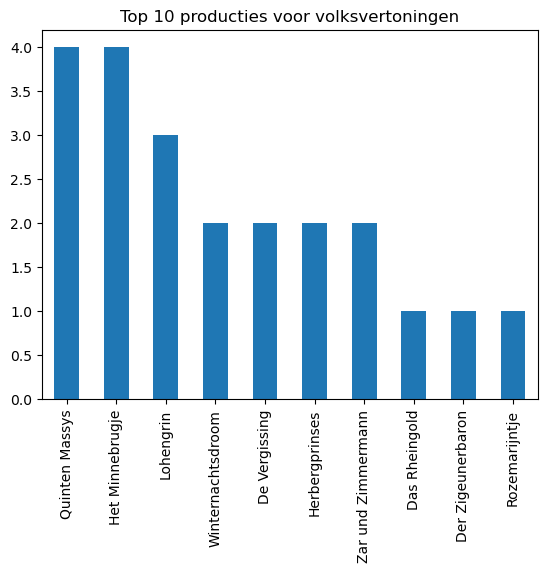

In [32]:
volk['Original title'].value_counts().head(10).plot(kind='bar', title= "Top 10 producties voor volksvertoningen");

<AxesSubplot:title={'center':"Meest voorkomende talen van gala's"}>

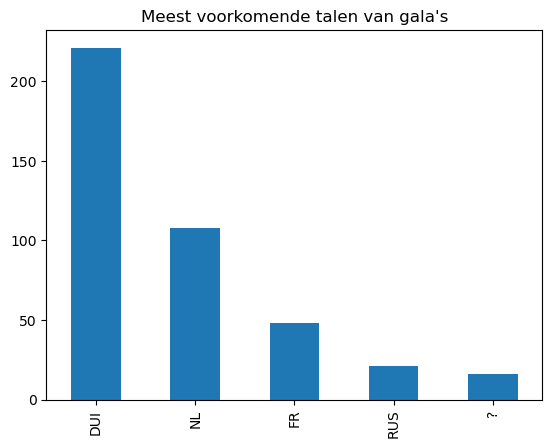

In [33]:
galas['Original language'].value_counts().head().plot(kind='bar', title = "Meest voorkomende talen van gala's")

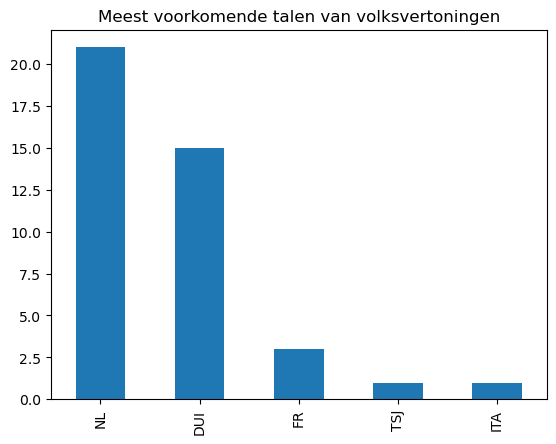

In [34]:
volk['Original language'].value_counts().plot(kind='bar', title = "Meest voorkomende talen van volksvertoningen");

## Relatieve frequenties

In [36]:
def plot_rel_freq(df):
    x = []
    y =  []
    for k, v in df['Original language'].value_counts().head().items():
        x.append(k)
        y.append(v/len(df))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y);


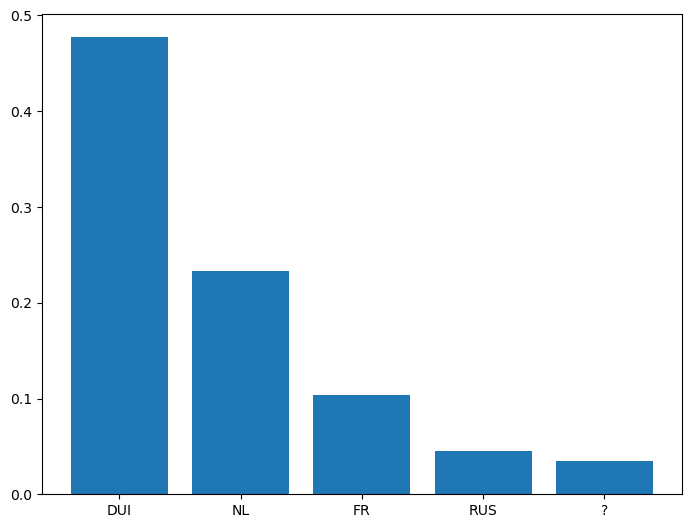

In [37]:
plot_rel_freq(galas)

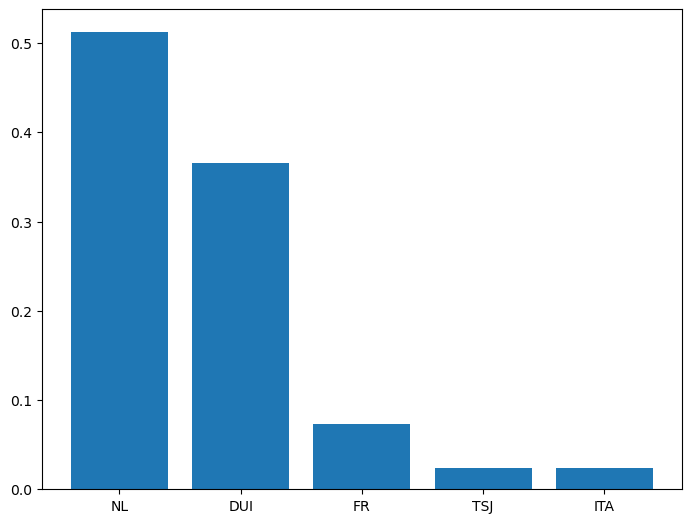

In [38]:
plot_rel_freq(volk)

### Gemiddelde tijd tussen wereldpremière van een stuk en eerste opvoering in Antwerpen.

In [57]:
eerste_voorkomen = []
for item in df.groupby('Original title')['Date'].min():
    eerste_voorkomen.append(item)


premiere = []
for item in df.groupby('Original title')['World-premiere'].min():
    premiere.append(item)


premiere = pd.to_datetime(pd.Series(premiere), dayfirst=True, errors='coerce');
eerste_voorkomen = pd.to_datetime(pd.Series(eerste_voorkomen), dayfirst=True, errors='coerce');

print(len(eerste_voorkomen) == len(premiere))


True


In [40]:
result = []
x = dict(zip(premiere, eerste_voorkomen))
for key, value in x.items():
    try:
        result.append(int(value.year) - int(key.year))
    except ValueError:
        continue
    

In [42]:
# Het duurt gemiddeld 45 jaar
def Average(lst):
    return sum(lst) / len(lst)

round(Average(result), 2)

44.89

# Taaldistributie van de programmatie per directie

In [43]:
table = pd.pivot_table(df, values='Image', index='Directors',
                    columns='Original language', aggfunc='count')

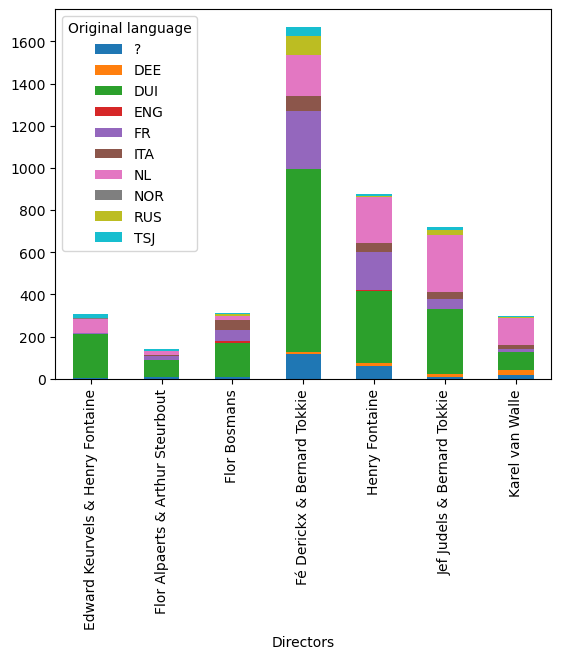

In [44]:
table.plot(kind='bar', stacked=True );
#Probeer hier nog 100% stacked bar-charts van te maken!!!


In excel is dat gemakkelijker

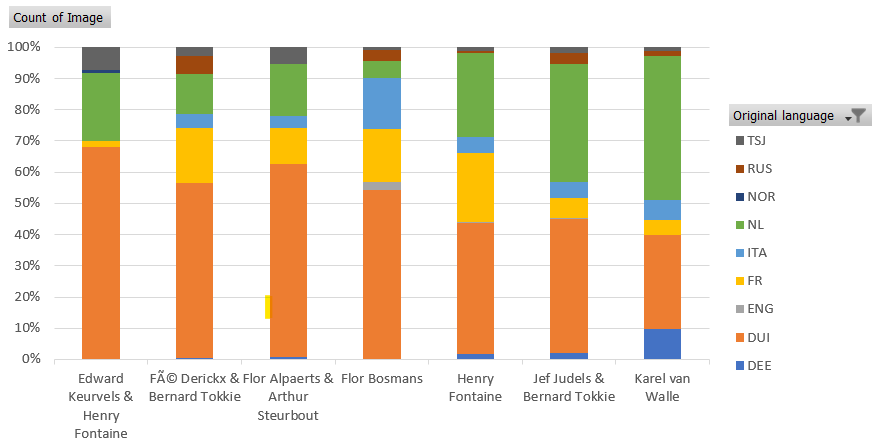